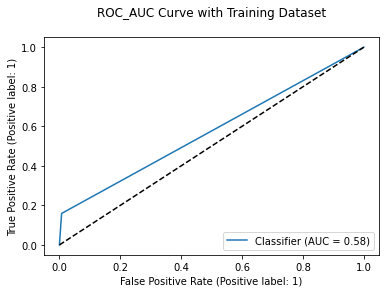

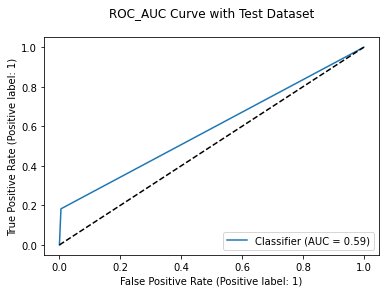

In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import string as strg
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report
from sklearn.neural_network import MLPClassifier
from statsmodels.stats.proportion import proportion_confint

def histogram(data, col):
    # Generates standard histogram
    name = col + '_distribution.png'
    
    str_split = col.split('_')
    mod_col = ' '.join(str_split)
            
    title = strg.capwords(mod_col) + ' Distribution'
    plt.figure()
    plt.title(title)
    plt.hist(data[col], edgecolor='white', bins=20)
    plt.xlabel(strg.capwords(mod_col))
    plt.ylabel('Frequency')
    plt.savefig(name)
    plt.show()
    plt.close()

def line(x, y, title, xlabel, ylabel, filename, labels):
    # Generates line chart
    plt.figure()
    plt.subplots(figsize=(7,5))
    plt.title(title)
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.xticks(x,labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filename)
    plt.show()

def confint_plot(x,lower, upper, title, xlabel, ylabel, filename, labels):
    # Generates 95% Confidence Interval Plot
    plt.subplots(figsize=(7,5))
    plt.scatter((x,x),(lower,upper))
    plt.plot((x,x),(lower,upper),'o-')
    plt.xticks(x,labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.savefig(filename)
    plt.show()
    
def data_prep(data, feat, targ, rand, norm=False):
    
    # Storing feature inputs and target inputs
    x = data[feat]
    y = data[targ]
    
    # 60/40 train/test randomized split with or without normalization
    if norm == True:
        x_train, x_test = train_test_split(x , train_size=0.6, test_size=0.4, 
                                           random_state=rand)
        
        y_train, y_test = train_test_split(y , train_size=0.6, test_size=0.4, 
                                           random_state=rand)

        x_train = preprocessing.normalize(x_train)
        x_test = preprocessing.normalize(x_test)
        
        x_train = pd.DataFrame(x_train, columns=feat)
        x_test = pd.DataFrame(x_test, columns=feat)
        
    else:
        x_train, x_test = train_test_split(x , train_size=0.6, test_size=0.4, 
                                           random_state=rand)
        
        
        y_train, y_test = train_test_split(y , train_size=0.6, test_size=0.4, 
                                           random_state=rand)
    
    return x_train, x_test, y_train, y_test    

def forward_neural_network(hid_layers, optimizer, learn_rate, rand, act_func, x_train, 
                           x_test, y_train, y_test, roc=True, cm=True, pred_test=True, 
                           print_res=True, multi_class=True):
    
    # Instantiating a neural network object
    # Train the neural network using training dataset
    # Predict the output with training or test dataset
    # Generate the appropriate pwerformance metrics
    fnn = MLPClassifier(hidden_layer_sizes=hid_layers, solver=optimizer, 
                        learning_rate_init=learn_rate, max_iter=5500, 
                        random_state=rand, activation=act_func)
    
    fnn.fit(x_train, y_train)
    
    
    if pred_test:
        y_pred = fnn.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        
        if print_res:
            print('Accuracy Report with Test Data\n')
            print(cr + '\n')
        
        if cm:
            conf_mat = confusion_matrix(y_test, y_pred)
            fig, ax = plt.subplots(figsize=(10,10))
            ax2 = sn.heatmap(conf_mat, annot=True, ax=ax, cmap='Blues')
            ax2.set_title('Confusion Matrix for Class Prediction with Test Dataset\n\n')
            ax2.set_xlabel('Predicted')
            ax2.set_ylabel('Actual')
            
            if multi_class:
                ax2.xaxis.set_ticklabels([1,2,3,4])
                ax2.yaxis.set_ticklabels([1,2,3,4])
                
#                 ax2.xaxis.set_ticklabels([1,3])
#                 ax2.yaxis.set_ticklabels([1,3])
                
            plt.savefig('confusion_matrix_test.png')
            plt.show()
        
        if roc:
            RocCurveDisplay.from_predictions(y_test, y_pred)
            plt.title('ROC_AUC Curve with Test Dataset\n')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.savefig('roc_curve_test.png')
            plt.show()
        
    else:    
        y_pred = fnn.predict(x_train)
        acc = accuracy_score(y_train, y_pred)
        cr = classification_report(y_train, y_pred)
    
        if print_res:
            print('Accuracy Report with Training Data\n')
            print(cr + '\n')
            
        if cm:
            conf_mat = confusion_matrix(y_train, y_pred)
            fig, ax = plt.subplots(figsize=(10,10))
            ax2 = sn.heatmap(conf_mat, annot=True, ax=ax, cmap='Blues')
            ax2.set_title('Confusion Matrix for Class Prediction with Training Dataset\n\n')
            ax2.set_xlabel('Predicted')
            ax2.set_ylabel('Actual')
            
            if multi_class: 
                ax2.xaxis.set_ticklabels([1,2,3,4])
                ax2.yaxis.set_ticklabels([1,2,3,4])
                
#                 ax2.xaxis.set_ticklabels([1,3])
#                 ax2.yaxis.set_ticklabels([1,3])
            
            plt.savefig('confusion_matrix_training.png')
            plt.show()
        
        if roc:
            RocCurveDisplay.from_predictions(y_train, y_pred)
            plt.title('ROC_AUC Curve with Training Dataset\n')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.savefig('roc_curve_training.png')
            plt.show()

    return acc

def plot_results():
    #Plot line charts based on the performance metric results
    scenario = [1,2,3,4]
    labels = ['5','10','15','20']
    acc_mean2 = [0.594,0.609,0.607,0.618]
    acc_std2 = [0.018,0.02,0.02,0.016]
    lower2 = [0.57,0.586,0.584,0.595]
    upper2 = [0.618,0.633,0.631,0.641]
    xlabel = '\nHidden Layer Node Size'

    title = 'Accuracy Means Based on Node Sizes\n'
    ylabel = 'Accuracy Mean\n'
    filename = 'scenario_accuracy_mean2.png'

    line(scenario, acc_mean2, title, xlabel, ylabel, filename, labels)

    title = 'Accuracy Standard Deviations Based on Node Sizes\n'
    ylabel = 'Accuracy Standard Deviation\n'
    filename = 'scenario_accuracy_std2.png'

    line(scenario, acc_std2, title, xlabel, ylabel, filename, labels) 

    title = '95% Confidence Interval Based on Node Sizes\n'
    ylabel = 'Accuracy Score\n'
    filename = 'scenario_confint2.png'

    confint_plot(scenario, lower2, upper2, title, xlabel, ylabel, filename, labels) 

    labels = ['0.1','0.01','0.001','0.0001']
    acc_mean3 = [0.629,0.635,0.618,0.572]
    acc_std3 = [0.014,0.011,0.016,0.018]
    lower3 = [0.606,0.612,0.595,0.548]
    upper3 = [0.652,0.658,0.641,0.595]
    xlabel = '\nLearning Rate'

    title = 'Accuracy Means Based on Learning Rates\n'
    ylabel = 'Accuracy Mean\n'
    filename = 'scenario_accuracy_mean3.png'

    line(scenario, acc_mean3, title, xlabel, ylabel, filename, labels)

    title = 'Accuracy Standard Deviations Based on Learning Rates\n'
    ylabel = 'Accuracy Standard Deviation\n'
    filename = 'scenario_accuracy_std3.png'

    line(scenario, acc_std3, title, xlabel, ylabel, filename, labels) 

    title = '95% Confidence Interval Based on Learning Rates\n'
    ylabel = 'Accuracy Score\n'
    filename = 'scenario_confint3.png'

    confint_plot(scenario, lower3, upper3, title, xlabel, ylabel, filename, labels)

    labels = ['1','2','3','4']
    acc_mean4 = [0.635,0.635,0.631,0.634]
    acc_std4 = [0.011,0.009,0.013,0.017]
    lower4 = [0.612,0.612,0.608,0.61]
    upper4 = [0.658,0.658,0.654,0.657]
    xlabel = '\nHidden Layer Size'

    title = 'Accuracy Means Based on Layer Sizes\n'
    ylabel = 'Accuracy Mean\n'
    filename = 'scenario_accuracy_mean4.png'

    line(scenario, acc_mean4, title, xlabel, ylabel, filename, labels)

    title = 'Accuracy Standard Deviations Based on Layer Sizes\n'
    ylabel = 'Accuracy Standard Deviation\n'
    filename = 'scenario_accuracy_std4.png'

    line(scenario, acc_std4, title, xlabel, ylabel, filename, labels) 

    title = '95% Confidence Interval Based on Layer Sizes\n'
    ylabel = 'Accuracy Score\n'
    filename = 'scenario_confint4.png'

    confint_plot(scenario, lower4, upper4, title, xlabel, ylabel, filename, labels)

    scenario = [1,2]
    labels = ['test_sgd','test_adam']
    acc_mean5 = [0.635,0.644]
    acc_std5 = [0.009,0.01]
    lower5 = [0.612,0.621]
    upper5 = [0.658,0.667]
    xlabel = '\nOptimizers'

    title = 'Accuracy Means Based on Optimizers with the Test Dataset\n'
    ylabel = 'Accuracy Mean\n'
    filename = 'scenario_accuracy_mean5.png'

    line(scenario, acc_mean5, title, xlabel, ylabel, filename, labels)

    title = 'Accuracy Standard Deviations Based on Optimizers with the Test Dataset\n'
    ylabel = 'Accuracy Standard Deviation'
    filename = 'scenario_accuracy_std5.png'

    line(scenario, acc_std5, title, xlabel, ylabel, filename, labels) 

    title = '95% Confidence Interval Based on Optimizers with the Test Dataset\n'
    ylabel = 'Accuracy Score'
    filename = 'scenario_confint5.png'

    confint_plot(scenario, lower5, upper5, title, xlabel, ylabel, filename, labels)

def main():
    warnings.filterwarnings('ignore')
    
    abalone = pd.read_csv('abalone.data', header = None)
    
    abalone.columns = ['sex','length','diameter','height',
                   'whole_weight','shucked_weight','viscera_weight',
                   'shell_weight','rings']
    
#     display(abalone.info())
#     display(abalone.describe())
    
#     desc = abalone.describe()
    
#     desc.to_excel('desc.xlsx')
    
    #Data cleaning and transformation
#     Q1 = abalone['diameter'].quantile(0.25)
#     Q3 = abalone['diameter'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5*IQR
#     upper = Q3 + 1.5*IQR
 
#     # Create arrays of Boolean values indicating the outlier rows
#     upper_array = np.where(abalone['diameter']>=upper)[0]
#     lower_array = np.where(abalone['diameter']<=lower)[0]
 
#     # Removing the outliers
#     abalone.drop(index=upper_array, inplace=True)
#     abalone.drop(index=lower_array, inplace=True)
    
    abalone.loc[abalone['sex'] == 'M','sex'] = 1
    abalone.loc[abalone['sex'] == 'F','sex'] = 2
    abalone.loc[abalone['sex'] == 'I','sex'] = 3
    
    abalone['class'] = 0
    
    class1 = (abalone['rings'] >= 0) & (abalone['rings'] <= 7)
    class2 = (abalone['rings'] >= 8) & (abalone['rings'] <= 10)
    class3 = (abalone['rings'] >= 11) & (abalone['rings'] <= 15)
    class4 = abalone['rings'] > 15

    #ovr value 0 is for multi-class classification
    #ovr values 1, 2, 3, and 4 are for binary classification to generate roc_auc curve
    ovr = 4
    
    #Assign 2, 3, 4, 5, or 6 for the task value
    task = 6
    
    if ovr == 0:
        abalone.loc[class1,'class'] = 1
        abalone.loc[class2,'class'] = 2
        abalone.loc[class3,'class'] = 3
        abalone.loc[class4,'class'] = 4
    
    elif ovr == 1: 
            abalone.loc[class1,'class'] = 1
            abalone.loc[class2,'class'] = 0
            abalone.loc[class3,'class'] = 0
            abalone.loc[class4,'class'] = 0
            
    elif ovr == 2:
            abalone.loc[class1,'class'] = 0
            abalone.loc[class2,'class'] = 1
            abalone.loc[class3,'class'] = 0
            abalone.loc[class4,'class'] = 0
        
    elif ovr == 3:
            abalone.loc[class1,'class'] = 0
            abalone.loc[class2,'class'] = 0
            abalone.loc[class3,'class'] = 1
            abalone.loc[class4,'class'] = 0
    
    elif ovr == 4:
        abalone.loc[class1,'class'] = 0
        abalone.loc[class2,'class'] = 0
        abalone.loc[class3,'class'] = 0
        abalone.loc[class4,'class'] = 1

#     condition = (abalone['class'] == 1) | (abalone['class'] == 3)   
    
#     abalone = abalone[condition]
    
    abalone = abalone.astype(float)
    
    feat = list(abalone.columns[0:8])
    targ = [abalone.columns[9]]
    
    abalone.loc[abalone['height'] == 0, 'height'] = abalone['height'].mean()
     
    # Uncomment only when running the code outside of ed platform to obtain histograms
    # Plotting the distribution of the features and the class
#     for col in feat:
#         histogram(abalone, col)
       
#     histogram(abalone, targ[0])
    
    # Uncomment only when running the code outside of ed platform to obtain pie charts
    # Generating pie charts for abalone gender and age class proportion
#     male = abalone[abalone['sex'] == 1]
#     female = abalone[abalone['sex'] == 2]
#     infant = abalone[abalone['sex'] == 3]
    
#     male_prop = round(len(male)/len(abalone)*100,2)
#     female_prop = round(len(female)/len(abalone)*100,2)
#     infant_prop = round(len(infant)/len(abalone)*100,2)
    
#     prop_df = pd.DataFrame({' ': [male_prop, female_prop, infant_prop]},
#                       index = ['male', 'female', 'infant'])


#     prop_df.plot.pie(subplots=True, figsize=(10, 10), legend = False, autopct='%1.1f%%')
#     plt.legend(['Male', 'Female', 'Infant'],bbox_to_anchor=(1.03, 1))
#     plt.title('Proportion of Abalone by Sex (%)', fontsize=16)
#     plt.savefig('abalone_prop_sex.png')
#     plt.close()
    
#     class1 = abalone[abalone['class'] == 1]
#     class2 = abalone[abalone['class'] == 2]
#     class3 = abalone[abalone['class'] == 3]
#     class4 = abalone[abalone['class'] == 4]
    
#     class1_prop = round(len(class1)/len(abalone)*100,2)
#     class2_prop = round(len(class2)/len(abalone)*100,2)
#     class3_prop = round(len(class3)/len(abalone)*100,2)
#     class4_prop = round(len(class4)/len(abalone)*100,2)
    
#     prop_df = pd.DataFrame({' ': [class1_prop, class2_prop, class3_prop, class4_prop]},
#                       index = ['class 1', 'class 2', 'class 3', 'class 4'])


#     prop_df.plot.pie(subplots=True, figsize=(11, 11), legend = False, autopct='%1.1f%%')
#     plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'],bbox_to_anchor=(1.03, 1))
#     plt.title('Proportion of Abalone by Age Class (%)', fontsize=16)
#     plt.savefig('abalone_prop_age.png')
#     plt.close()
    
    # Task 2 is to evaluate performance results based on various node sizes
    # Task 3 is to evaluate performance results based on various learning rates
    # Task 4 is to evaluate performance results based on various hidden layer sizes
    # Task 5 is to evaluate performance results based on various optimizers
    # Task 6 is to evaluate performance results on the final model
    feat_train, feat_test, targ_train, targ_test = data_prep(abalone, feat, targ, 0)

    sample_size = len(targ_test)
    
    if task == 2: 
        hn_list = [5,10,15,20]
        
        for hn in hn_list:
            hid_layers = (hn,)
            optimizer = 'sgd'
            learn_rate = 1e-03
            act_func = 'relu'

            acc_vals = []

            for i in range(10):
                feat_train, feat_test, targ_train, targ_test = data_prep(abalone, feat, targ, i)

                targ_train = targ_train.values
                targ_test = targ_test.values

                targ_train = targ_train.reshape(-1)
                targ_test = targ_test.reshape(-1)

                acc = forward_neural_network(hid_layers, optimizer, learn_rate, i, act_func, feat_train, 
                                             feat_test, targ_train, targ_test, roc=False, cm=False, print_res=False)

                acc_vals.append(acc)

            acc_mean = stat.mean(acc_vals)
            acc_std = stat.stdev(acc_vals)
            correct_pred = acc_mean*sample_size
            lower, upper = proportion_confint(correct_pred, sample_size, 0.05)        
            
            print('Neural Network Performance Summary with 1 Hidden Layer and ' + str(hn) + ' Hidden Nodes\n')
            print('Accuracy Mean: ' + str(round(acc_mean,3)))
            print('Accuracy Standard Deviation: ' + str(round(acc_std,3)))
            print('Lower: %.3f, Upper: %.3f' % (lower, upper) + '\n')
            
    elif task == 3:
        lr_list = [1e-01, 1e-02, 1e-03, 1e-04]
        
        for lr in lr_list:
            hid_layers = (20,)
            optimizer = 'sgd'
            learn_rate = lr
            act_func = 'relu'

            acc_vals = []

            for i in range(10):
                feat_train, feat_test, targ_train, targ_test = data_prep(abalone, feat, targ, i)

                targ_train = targ_train.values
                targ_test = targ_test.values

                targ_train = targ_train.reshape(-1)
                targ_test = targ_test.reshape(-1)

                acc = forward_neural_network(hid_layers, optimizer, learn_rate, i, act_func, feat_train, 
                                             feat_test, targ_train, targ_test, roc=False, cm=False, print_res=False)

                acc_vals.append(acc)

            acc_mean = stat.mean(acc_vals)
            acc_std = stat.stdev(acc_vals)
            correct_pred = acc_mean*sample_size
            lower, upper = proportion_confint(correct_pred, sample_size, 0.05)   

            print('Neural Network Performance Summary with Learning Rate ' + str(lr) + '\n')
            print('Accuracy Mean: ' + str(round(acc_mean,3)))
            print('Accuracy Standard Deviation: ' + str(round(acc_std,3)))
            print('Lower: %.3f, Upper: %.3f' % (lower, upper) + '\n')
    
    elif task == 4:
        hl_list = [(20,),(20,20),(20,20,20),(20,20,20,20)]
        hl_size = 0
        
        for hl in hl_list:
            hid_layers = hl
            optimizer = 'sgd'
            learn_rate = 1e-02
            act_func = 'relu'

            acc_vals = []

            for i in range(10):
                feat_train, feat_test, targ_train, targ_test = data_prep(abalone, feat, targ, i)

                targ_train = targ_train.values
                targ_test = targ_test.values

                targ_train = targ_train.reshape(-1)
                targ_test = targ_test.reshape(-1)

                acc = forward_neural_network(hid_layers, optimizer, learn_rate, i, act_func, feat_train, 
                                             feat_test, targ_train, targ_test, roc=False, cm=False, print_res=False)

                acc_vals.append(acc)

            acc_mean = stat.mean(acc_vals)
            acc_std = stat.stdev(acc_vals)
            correct_pred = acc_mean*sample_size
            lower, upper = proportion_confint(correct_pred, sample_size, 0.05)
            hl_size += 1

            if hl_size == 1:
                print('Neural Network Performance Summary with 1 Hidden Layer and 20 Hidden Nodes\n')
                print('Accuracy Mean: ' + str(round(acc_mean,3)))
                print('Accuracy Standard Deviation: ' + str(round(acc_std,3)))
                print('Lower: %.3f, Upper: %.3f' % (lower, upper) + '\n')
                
            else:
                print('Neural Network Performance Summary with ' + str(hl_size) + ' Hidden Layers and 20 Hidden Nodes\n')
                print('Accuracy Mean: ' + str(round(acc_mean,3)))
                print('Accuracy Standard Deviation: ' + str(round(acc_std,3)))
                print('Lower: %.3f, Upper: %.3f' % (lower, upper) + '\n')
    
    elif task == 5:
        opt_list = ['sgd','adam']
        pt_list = [False,True]
        
        for pt in pt_list:
            for opt in opt_list:
                hid_layers = (20,20)
                optimizer = opt
                learn_rate = 1e-02
                act_func = 'relu'

                acc_vals = []

                for i in range(10):
                    feat_train, feat_test, targ_train, targ_test = data_prep(abalone, feat, targ, i)

                    targ_train = targ_train.values
                    targ_test = targ_test.values

                    targ_train = targ_train.reshape(-1)
                    targ_test = targ_test.reshape(-1)

                    acc = forward_neural_network(hid_layers, optimizer, learn_rate, i, act_func, feat_train, feat_test, 
                                                 targ_train, targ_test, roc=False, cm=False, print_res=False, pred_test=pt)

                    acc_vals.append(acc)

                acc_mean = stat.mean(acc_vals)
                acc_std = stat.stdev(acc_vals)
                correct_pred = acc_mean*sample_size
                lower, upper = proportion_confint(correct_pred, sample_size, 0.05) 
                
                if pt == False:
                    print('Neural Network Performance Summary with ' + opt + ' and Training Dataset\n')
                    print('Accuracy Mean: ' + str(round(acc_mean,3)))
                    print('Accuracy Standard Deviation: ' + str(round(acc_std,3)))
                    print('Lower: %.3f, Upper: %.3f' % (lower, upper) + '\n')
                else:
                    print('Neural Network Performance Summary with ' + opt + ' and Test Dataset\n')
                    print('Accuracy Mean: ' + str(round(acc_mean,3)))
                    print('Accuracy Standard Deviation: ' + str(round(acc_std,3)))
                    print('Lower: %.3f, Upper: %.3f' % (lower, upper) + '\n')        
    
    elif task == 6:
        feat_train, feat_test, targ_train, targ_test = data_prep(abalone, feat, targ, 1)

        targ_train = targ_train.values
        targ_test = targ_test.values

        targ_train = targ_train.reshape(-1)
        targ_test = targ_test.reshape(-1)

        hid_layers = (20,20)
        optimizer = 'adam'
        learn_rate = 1e-02
        rand = 42
        act_func = 'relu'

        if ovr == 0:
            forward_neural_network(hid_layers, optimizer, learn_rate, rand, act_func, feat_train, feat_test, 
                                             targ_train, targ_test, roc=False, pred_test=False)

            forward_neural_network(hid_layers, optimizer, learn_rate, rand, act_func, feat_train, feat_test, 
                                             targ_train, targ_test, roc=False)
        
        else:
            forward_neural_network(hid_layers, optimizer, learn_rate, rand, act_func, feat_train, feat_test, 
                                             targ_train, targ_test, cm=False, pred_test=False, print_res=False)

            forward_neural_network(hid_layers, optimizer, learn_rate, rand, act_func, feat_train, feat_test, 
                                             targ_train, targ_test, cm=False, print_res=False)
            
    # Change the plot_res to true only when the running the code outside of ed platform to obtain line charts
    # Calling performance results plotting function 
    plot_res = False
    
    if plot_res:
        plot_results()
    
if __name__ == '__main__':
     main()
